In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("yearly_bovespa.pkl")
data.head()

,Code,Date,AvgPrc,MaxPrc
codes,,,,
AALL34,NaN,NaN,Date 2019-10-03 103.00 2019-10-09 109.40...,Date 2019-10-03 103.00 2019-10-09 109.40...
AALL34F,NaN,NaN,Date 2019-08-16 193.89 2019-12-17 115.85...,Date 2019-08-16 193.89 2019-12-17 115.85...
AALR3,NaN,NaN,Date 2019-01-02 13.33 2019-01-03 13.40 2...,Date 2019-01-02 13.50 2019-01-03 13.65 2...
AALR3F,NaN,NaN,Date 2019-01-02 13.32 2019-01-03 13.47 2...,Date 2019-01-02 13.61 2019-01-03 13.70 2...
AALR3T,NaN,NaN,Date 2019-01-14 13.40 2019-01-22 14.27 2...,Date 2019-01-14 13.41 2019-01-22 14.28 2...


In [3]:
def plot_avg_prc(code, dataframe):
    plt.figure(1, (16, 6))

    plt.xlabel('Time')
    plt.title('Stocks Average Price')

    plt.text("2019-01", dataframe["AvgPrc"][code][0] + 3, code)
    plt.plot(dataframe["AvgPrc"][code], 'b', linewidth=1)

    plt.grid()

In [4]:
def calc_freq_series(code, dataframe, param):
    if not code in dataframe[param]:
        print("Error, code not present on dataset")
        return None
    percentage_series = pd.Series(index=data[param][code].index)
    for i in range(1, data[param][code].size):
        percentage_series[i-1] = (data[param][code][i] - data[param][code][i-1])/data[param][code][i-1]
    return percentage_series

In [5]:
# Feature Extraction
def feature_extraction(data, asset_code, param):
    cp = data[param][asset_code]
    stma = cp.rolling(window=4).mean() # short term moving average of cp
    ltma = cp.rolling(window=20).mean()
    # f1 - short term noise
    f1 = pd.Series(index=cp.index)
    # f2 - long term noise
    f2 = pd.Series(index=cp.index)
    
    dates = []
    for t in cp.index:
        dates.append(t)
        f1[t] = (cp[t] - stma[t])/stma[t]
        f2[t] = (cp[t] - ltma[t])/ltma[t]
        
    # short term gradient
    f3 = pd.Series(index=cp.index)
    # long term gradient
    f4 = pd.Series(index=cp.index)
    for t in range(len(dates)):
        f3[t] = (stma[t] - stma[t-1])/stma[t]
        f4[t] = (ltma[t] - ltma[t-1])/ltma[t]

    # relative high-low position (positions of the observation in relation to its moving minimum and maximum)
    f5 = pd.Series(index=cp.index)
    
    f6 = pd.Series(index=cp.index)
    moving_min = moving_max = cp[0]
    for t in range(len(dates)):
        f5[t] = (cp[t] - moving_min)/(moving_max - moving_min)
        
        if cp[t] < moving_min:
            moving_min = cp[t]
        elif cp[t] > moving_max:
            moving_max = cp[t]
    return f1, f2, f3, f4, f5

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

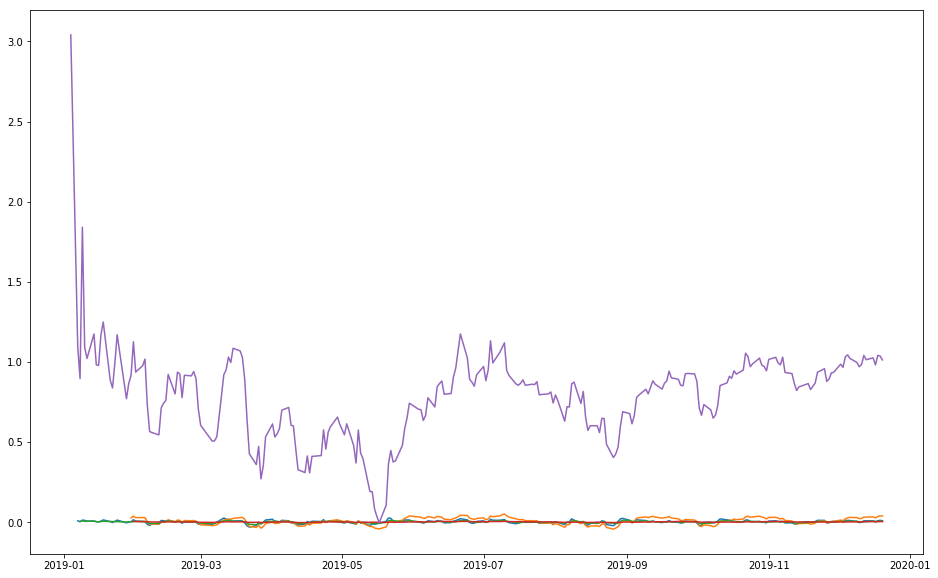

In [6]:
features = feature_extraction(data, "BOVA11", "AvgPrc")

plt.figure(1, (16, 10))
for i in range(len(features)):
    plt.plot(features[i])
plt.grid

In [7]:
# Normalize and discretize
def z_score(time_series):
    return (time_series - time_series.mean())/time_series.std()  

In [8]:
V = (z_score(features[0]), z_score(features[1]), z_score(features[2]), z_score(features[3]), z_score(features[4]))

In [9]:
# Creating the network itself from the feature series

In [6]:
import tensorflow as tf

In [9]:
sess = tf.Session()

train_points = tf.placeholder(tf.float32, (100, 100))

best_8 = tf.Variable(tf.zeros((100, 8)))

w = tf.Variable(tf.random_uniform((8,), -1, 1))


prediction = tf.

label = tf.placeholder(tf.fload32, [someshape])

cross_entropy = -tf.reduce_sum(label*tf.log(prediction), axis=1) #colapse columns

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

for i in range(iterations):
    batch_train_points, batch_label = data.next_batch()
    sess.run(train_step, feed_dict={train_points: batch_train_points,
                                   label: batch_label})


## SVM Model for classification

In [7]:
# Linear Classification Model
import sklearn
from sklearn import svm

In [67]:
model = svm.SVC()


x_train = np.zeros((data["AvgPrc"]["AZUL4F"].size - 99, 100))
y_train = np.zeros((data["AvgPrc"]["AZUL4F"].size - 99))
for i in range(data["AvgPrc"]["AZUL4F"].size - 101):
    x_train[i] = data["AvgPrc"]["AZUL4F"][i:100 + i].values
    if data["AvgPrc"]["AZUL4F"][101 + i] > data["AvgPrc"]["AZUL4F"][100-5 + i:100 + i].mean():
        y_train[i] = 1
    else:
        y_train[i] = 0

In [9]:
model.fit(x_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
x_test = [data["AvgPrc"]["AZUL4F"][20:100 + 20].values]
model.predict(x_test)

array([0.])

In [11]:
predictions = model.predict(x_train)
predictions.shape

(145,)

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


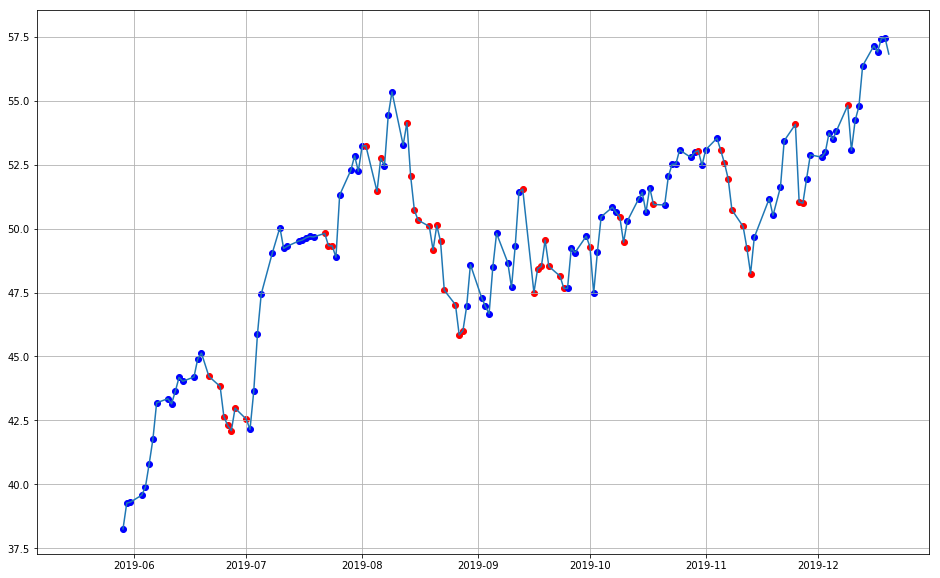

In [12]:
plt.figure(1, (16, 10))

for i in range(100, data["AvgPrc"]["AZUL4F"].size - 1):
    if predictions[i-100] == 0:
        plt.scatter(data["AvgPrc"]["AZUL4F"].index[i], data["AvgPrc"]["AZUL4F"][i], color='r')
    else:
        plt.scatter(data["AvgPrc"]["AZUL4F"].index[i], data["AvgPrc"]["AZUL4F"][i], color='b')
plt.plot(data["AvgPrc"]["AZUL4F"].index[100:244], data["AvgPrc"]["AZUL4F"][100:244])

plt.grid()

## Now using a Neural Network to classify

In [133]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [138]:
look_back = 50
moving_average_param = 5 # 5 last days for moving average
train_size = 100

x_train = np.zeros((data["AvgPrc"]["AZUL4F"].size - look_back, look_back))
y_train = np.zeros((data["AvgPrc"]["AZUL4F"].size - look_back))
for i in range(data["AvgPrc"]["AZUL4F"].size - look_back - 1):
    x_train[i] = data["AvgPrc"]["AZUL4F"][i:look_back + i].values
    if data["AvgPrc"]["AZUL4F"][look_back + i] > data["AvgPrc"]["AZUL4F"][look_back-moving_average_param + i:look_back + i].mean():
        y_train[i] = 1
    else:
        y_train[i] = 0
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
#y_train = np.reshape(y_train, (1, 1, y_train.shape[0]))
y_train = keras.utils.to_categorical(y_train)
y_train = np.reshape(y_train, (2, 1, y_train.shape[0]))

In [139]:
model = Sequential()


model.add(keras.layers.LSTM(4, activation='tanh', input_shape = (1, look_back)))
model.add(keras.layers.Dense(2))
#model.add(keras.layers.Dense(1))
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

ValueError: Input arrays should have the same number of samples as target arrays. Found 194 input samples and 2 target samples.

In [100]:
predictions = model.predict(x_train)
predictions

array([[-0.4658803 , -0.71407276],
       [-0.4658803 , -0.71407294],
       [-0.4658803 , -0.71407294],
       [-0.46588027, -0.71407324],
       [-0.46588024, -0.7140733 ],
       [-0.46588024, -0.7140733 ],
       [-0.46588024, -0.7140733 ],
       [-0.46588024, -0.7140733 ],
       [-0.46588024, -0.7140733 ],
       [-0.46588024, -0.7140733 ],
       [-0.46588027, -0.71407324],
       [-0.46588027, -0.71407306],
       [-0.46588027, -0.71407324],
       [-0.46588027, -0.7140731 ],
       [-0.46588033, -0.71407264],
       [-0.4658803 , -0.7140729 ],
       [-0.46588036, -0.71407235],
       [-0.46588045, -0.7140713 ],
       [-0.46588027, -0.71407306],
       [-0.46588027, -0.7140731 ],
       [-0.46588027, -0.7140732 ],
       [-0.46588024, -0.7140733 ],
       [-0.46588027, -0.71407324],
       [-0.4658803 , -0.714073  ],
       [-0.46588033, -0.7140725 ],
       [-0.46588036, -0.71407217],
       [-0.46588027, -0.71407306],
       [-0.46588027, -0.7140732 ],
       [-0.46588027,

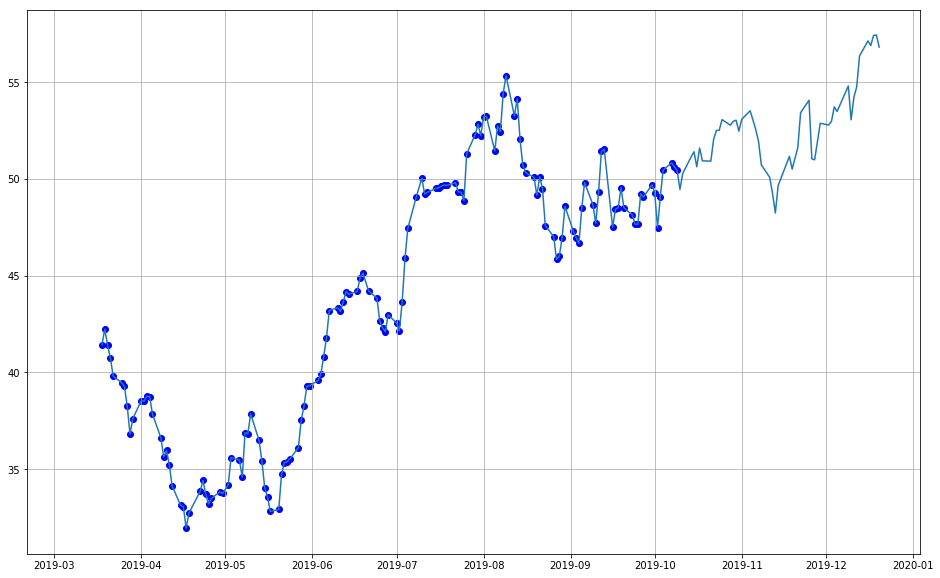

In [107]:
plt.figure(1, (16, 10))

for i in range(look_back, data["AvgPrc"]["AZUL4F"].size - look_back):
    if predictions[i][0] > predictions[i][1] == 0:
        plt.scatter(data["AvgPrc"]["AZUL4F"].index[i], data["AvgPrc"]["AZUL4F"][i], color='r')
    else:
        plt.scatter(data["AvgPrc"]["AZUL4F"].index[i], data["AvgPrc"]["AZUL4F"][i], color='b')
plt.plot(data["AvgPrc"]["AZUL4F"].index[look_back:244], data["AvgPrc"]["AZUL4F"][look_back:244])

plt.grid()

In [14]:
def prepare_dataset(dataset, lookback, lookfront, train_size):
    data_x, data_y = [], []
    for i in range(dataset["AvgPrc"]["AZUL4F"].size - lookback - lookfront - 1):
        data_x.append(dataset["AvgPrc"]["AZUL4F"][i:lookback + i].values)
        data_y.append(dataset["AvgPrc"]["AZUL4F"][lookback + i:lookfront + lookback + i].values)
    
#     scaler = MinMaxScaler(feature_range=(0,1))
#     data_x = scaler.fit_transform(data_x)
#     data_y = scaler.fit_transform(data_y)
    
    test_size = len(data_x) - train_size
    
    # splitting between training and testing datasets
    x_test = data_x[:100]
    x_train = data_x[101:]
    
    y_test = data_y[:100]
    y_train = data_y[101:]
    
    x_test = np.reshape(x_test, (len(x_test), 1, len(x_test[1])))
    x_train = np.reshape(x_train, (len(x_train), 1, len(x_train[1])))
    y_test = np.reshape(y_test, (len(y_test), 1, len(y_test[1])))
    y_train = np.reshape(y_train, (len(y_train), 1, len(y_train[1])))
    return x_train, y_train, x_test, y_test

In [76]:
look_back = 50
look_front = 20
moving_average_param = 5 # 5 last days for moving average
train_size = 100

x_train, y_train, x_test, y_test = prepare_dataset(data, 50, 20, 100)

model = Sequential()


model.add(keras.layers.LSTM(16, activation='tanh', input_shape = (1, look_back)))
model.add(keras.layers.Dense(16*look_back))
model.add(keras.layers.Dense(8*look_back))
model.add(keras.layers.Dense(4*look_back))
model.add(keras.layers.Dense(2*look_front))
model.add(keras.layers.Dense(look_front))
#model.add(keras.layers.Dense(1))
model.compile(loss='logcosh', optimizer='adam')

model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=2)

ValueError: A target array with shape (72, 1, 20) was passed for an output of shape (None, 20) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

In [16]:
y_train[1]

array([[54.14, 52.05, 50.71, 50.33, 50.08, 49.16, 50.12, 49.5 , 47.59,
        47.02, 45.84, 46.01, 46.96, 48.59, 47.3 , 46.96, 46.67, 48.49,
        49.81, 48.67]])

In [58]:
predictions = model.predict(x_test)
predictions[1]

array([52.29449 , 53.03418 , 52.49837 , 52.644978, 52.144356, 52.692524,
       53.789845, 53.05839 , 53.240963, 52.648666, 52.697376, 52.849537,
       53.06605 , 53.89514 , 53.903732, 53.193165, 53.57546 , 55.000347,
       54.015144, 53.82978 ], dtype=float32)

In [59]:
(len(predictions)/(x_test[1].size + len(predictions[1]))-1)

0.4285714285714286

entrou


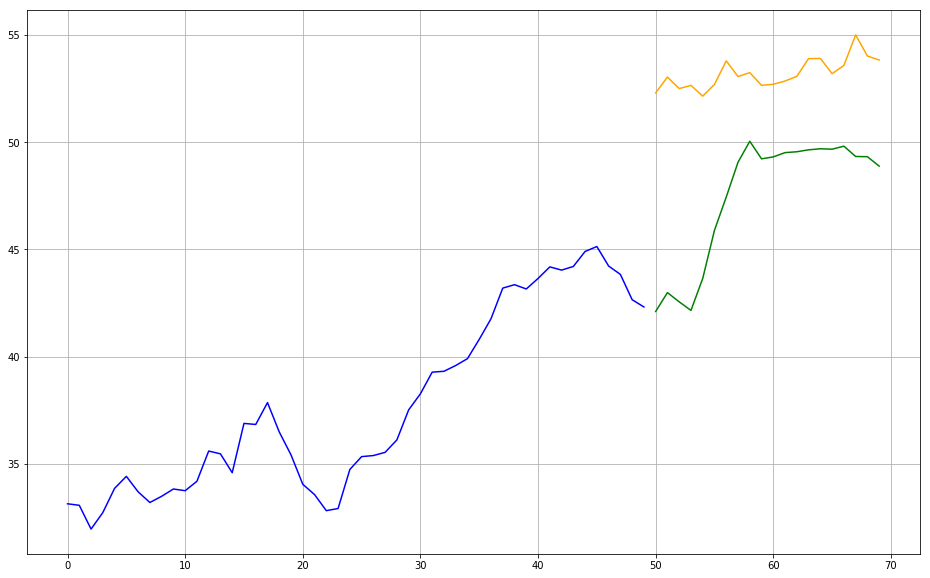

In [65]:
plt.figure(1, (16, 10))
u=0
for i in range(1):#round(len(x_train)/(x_test[1].size + len(predictions[1]))-1)):
    print("entrou")
    u += x_test[1].size + len(predictions[1])
    plt.plot(range(i*x_test[u].size, (i+1)*x_test[u].size), x_test[u][0], color="blue")
    plt.plot(range((i+1)*x_test[u].size, (i+1)*x_test[u].size + y_test[u].size), predictions[u], color='orange')
    plt.plot(range((i+1)*x_test[u].size, (i+1)*x_test[u].size + y_test[u].size), y_test[u][0], color='green')
    
plt.grid()

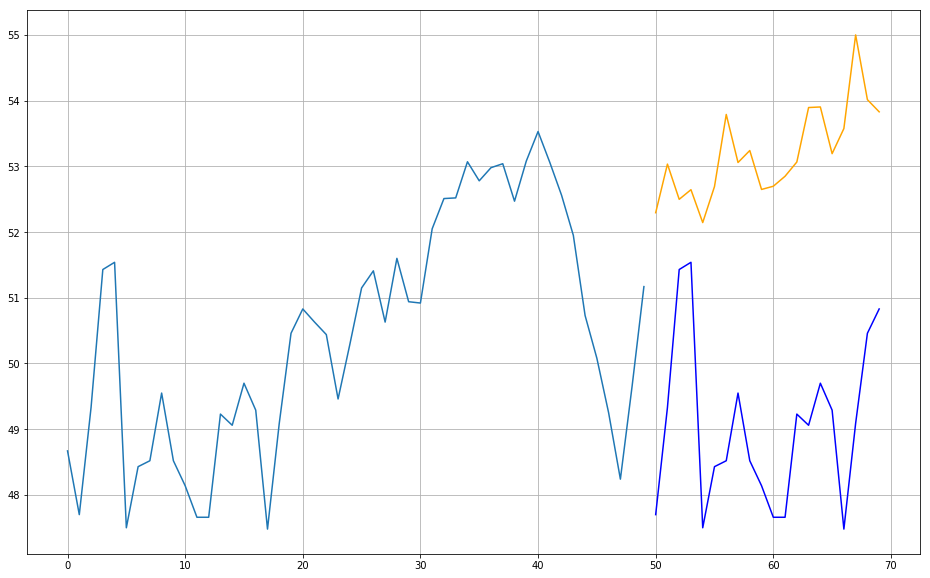

In [66]:
u=70
plt.figure(1, (16, 10))
plt.plot(range(x_train[u].size), x_train[u][0])
plt.plot(range(x_train[u].size, x_train[u].size + y_train[u].size), x_train[u + 1][0][:y_train[u].size], color='b')

plt.plot(range(x_train[u].size, x_train[u].size + y_train[u].size), predictions[u], color='orange')
plt.grid()
#plt.plot(range(x_test[1].size, 2*x_test[1].size), model.predict(np.reshape(x_test[1], (1, 1, x_test[1].shape[0]))))

In [22]:
model.predict(np.reshape(x_test[1], (1, 1, x_test[1].shape[0])))

array([[0.7829552]], dtype=float32)

In [32]:
x_test.shape

(125, 20)